<h1><i><strong>1. Importing Libraries</strong></i></h1> <h3>This cell imports various essential libraries for machine learning, data manipulation, and image processing:</h3> <ul> <li><strong><code>from sklearn.svm import SVC</code></strong>: Imports the Support Vector Classifier (SVC) for classification tasks.</li> <li><strong><code>from sklearn.cluster import KMeans</code></strong>: Imports KMeans clustering algorithm for unsupervised learning.</li> <li><strong><code>from sklearn.linear_model import LogisticRegression</code></strong>: Imports the Logistic Regression model for classification.</li> <li><strong><code>from sklearn.tree import DecisionTreeClassifier</code></strong>: Imports Decision Tree Classifier for classification tasks.</li> <li><strong><code>from sklearn.neighbors import KNeighborsClassifier</code></strong>: Imports K-Nearest Neighbors (KNN) classifier.</li> <li><strong><code>from sklearn.ensemble import AdaBoostClassifier</code></strong>: Imports AdaBoost classifier for ensemble learning.</li> <li><strong><code>from sklearn.model_selection import GridSearchCV</code></strong>: Imports GridSearchCV for hyperparameter tuning.</li> <li><strong><code>from sklearn.metrics import roc_curve, auc, accuracy_score</code></strong>: Imports metrics to evaluate model performance.</li> <li><strong><code>import matplotlib.pyplot as plt</code></strong>: Imports Matplotlib for plotting graphs.</li> <li><strong><code>from keras.api import layers, models</code></strong>: Imports Keras libraries to build and train neural networks.</li> <li><strong><code>import numpy as np</code></strong>: Imports Numpy for numerical operations.</li> <li><strong><code>import pandas as pd</code></strong>: Imports Pandas for data manipulation.</li> <li><strong><code>import sys</code></strong>: Allows for system-specific parameters, such as modifying the path.</li> <li><strong><code>sys.path.append("path")</code></strong>: Adds a custom directory to the system path to import custom modules, in this case, the Persian Alphabet Recognition project.</li> </ul>

In [3]:
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt
from keras.api import layers
from keras.api.models import Sequential
from keras.api.layers import Flatten
from keras.api.utils import to_categorical
import numpy as np
import keras
import pandas as pd
import sys
sys.path.append("F:\Programming\Python\Machine Learning\Persian-Alphabet-Recognition")
from Datasets.DataLoader.DataLoader import DataLoader, LABELS

Libraries Loaded Successfully


<h1><i><strong>2. Defining Dataset Paths and Hyperparameters</strong></i></h1> <h3>This cell defines paths to different datasets and sets hyperparameters:</h3> <ul> <li><strong><code>DATASET1</code>, <strong><code>DATASET2</code></strong>, <strong><code>DATASET3</code></strong>, and <strong><code>REAL_DATA</code></strong>: Variables that hold the file paths to different datasets used in the Persian Alphabet Recognition project.</li> <li><strong><code>IMAGE_SIZE</code></strong>: The size to which images will be resized (64x64).</li> <li><strong><code>SHRINK</code></strong>: A parameter that determines how much the images will be shrunk.</li> <li><strong><code>INPUT_SHAPE</code></strong>: The shape of the input images (64x64) for neural networks.</li> <li><strong><code>CLASSES</code></strong>: The number of classes (43) for classification in the recognition task.</li> <li><strong><code>THRESHOLD</code></strong>: A threshold used for various purposes like classification error rate or image processing.</li> <li><strong><code>EPOCHS</code></strong>: Number of epochs for training neural networks.</li> <li><strong><code>N_ESTIMATORS</code></strong>: The number of estimators (or trees) in ensemble models like AdaBoost.</li> </ul>

In [4]:
DATASET1 = "F:\Programming\Python\Machine Learning\Persian-Alphabet-Recognition\Datasets\DS-1"
DATASET2 = "F:\Programming\Python\Machine Learning\Persian-Alphabet-Recognition\Datasets\DS-2"
DATASET3 = "F:\Programming\Python\Machine Learning\Persian-Alphabet-Recognition\Datasets\DS-3"
REAL_DATA = "F:\Programming\Python\Machine Learning\Persian-Alphabet-Recognition\Datasets\Real Data"

IMAGE_SIZE = 64
SHRINK = 10
INPUT_SHAPE = (64, 64)
CLASSES = 43
THRESHOLD = 100

EPOCHS = 20
N_ESTIMATORS = 4

<h1><i><strong>3. Loading Data and Visualizing Samples</strong></i></h1> <h3>This cell loads the training and testing data and visualizes some image samples:</h3> <ul> <li><strong><code>dataloader = DataLoader(path=DATASET1, ...)</code></strong>: Initializes a DataLoader object that loads data from the specified dataset.</li> <li><strong><code>X_train, y_train, X_test, y_test</code></strong>: Variables that hold the training and testing data (images and labels).</li> <li><strong><code>Flatten()</code></strong>: Flattens the images from 2D arrays into 1D arrays for use with 1D models.</li> <li><strong><code>plt.imshow()</code></strong>: Used to display images in a grid.</li> <li>Images are plotted in a grid layout with their respective labels displayed.</li> <li>The loop goes through the training dataset, ensuring that each label is displayed exactly once in the grid.</li> </ul>

Loading Files and Dataset ...
Found Categories: ['1-alef', '2-b', '3-p', '4-t', '5-se', '6-jim', '7-che', '8-h', '9-kh', '10-d', '11-zal', '12-r', '13-z', '14-zh', '15-sin', '16-shin', '17-sad', '18-zad', '19-t-long', '20-z-long', '21-ayin', '22-ghyin', '23-f', '24-ghe', '25-k', '26-g', '27-le', '28-m', '29-n', '30-v', '31-he', '32-ye', '33-zero', '34-one', '35-two', '36-three', '37-four', '38-five', '39-six', '40-seven', '41-eight', '42-nine', '43-anewfive'] 

X-Train : (3439, 64, 64)
X-Test : (860, 64, 64)
Y-Train : (3439,)
Y-Test : (860,)


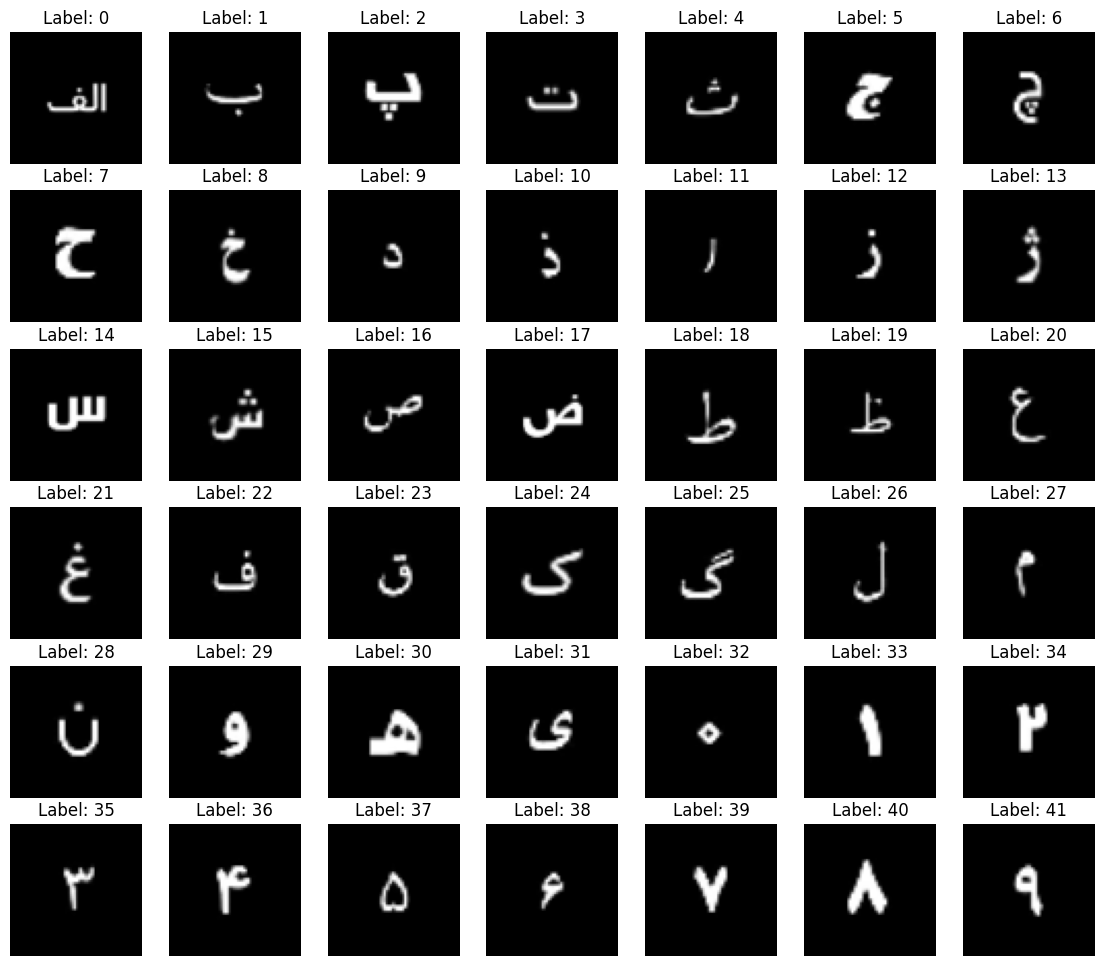

In [5]:
dataloader = DataLoader(path=DATASET1, image_size=IMAGE_SIZE, shrink=SHRINK, contrast=None, zoom=0.5, padding=0, invert=True)
X_train, y_train, X_test, y_test = dataloader.load_data()


print(f"X-Train : {X_train.shape}")
print(f"X-Test : {X_test.shape}")
print(f"Y-Train : {y_train.shape}")
print(f"Y-Test : {y_test.shape}")

X_train_1d = np.array(Flatten()(X_train))
X_test_1d = np.array(Flatten()(X_test))

used=[]
counter = 0
i = 0
plt.figure(figsize=(14, 12))
while counter != 42:
    while y_train[i] in used or y_train[i]!=counter:
        i+=1
        continue
    used.append(y_train[i])
    plt.subplot(6, 7, counter + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')
    counter+=1
plt.show()

<h1><i><strong>4. Implementing Adaptive Boosting Class</strong></i></h1> <h3>This cell implements an adaptive boosting (AdaBoost) class:</h3> <ul> <li><strong><code>class AdaptiveBoosting</code></strong>: Defines a custom AdaBoost class that uses weak learners to form a stronger model.</li> <li><strong><code>fit()</code></strong>: Trains the model by iteratively fitting weak learners, calculating their errors, and updating their weights.</li> <li><strong><code>predict()</code></strong>: Uses the trained weak learners to predict the labels of input data.</li> <li><strong><code>score()</code></strong>: Computes the accuracy of the model on the test data.</li> <li>The AdaBoost algorithm focuses on misclassified examples and gives them higher weights in subsequent rounds to improve overall performance.</li> </ul>

In [ ]:
class AdaptiveBoosting:
    def __init__(self, base_learner, n_estimators : int = 100) -> None:
        self.base_learner = base_learner
        self.n_estimators = n_estimators

    def fit(self, x_train, y_train):

        N = x_train.shape[0]
        self.W = np.full(N, fill_value=(1/N))

        self.learners = []
        self.weights  = []

        for i in range(self.n_estimators):
            print(f"{i+1}. Fitting Learner {i+1} on Training Data...")

            current_learner = self.base_learner.fit(x_train, y_train)
            self.learners.append(current_learner)

            print(f"    - Calculating Learner Error\r", end='', flush=True)
            isfalse = 1 - (current_learner.predict(x_train) == y_train)
            error = np.sum(self.W * isfalse) / np.sum(self.W, axis=0)

            print(f"    - Calculating Weight       \r", end='', flush=True)
            current_weight = np.log((1-error) / error)
            self.weights.append(current_weight)

            print(f"    - Updating Weights         \r", end='', flush=True)
            self.W = self.W * np.exp(current_weight * isfalse)
            
            print(f"    Done.                       ")
            print()

    def predict(self, x):

        y_preds = []
        for estimator in self.learners:
            y_preds.append(estimator.predict(x))

        y_preds = np.asarray(y_preds)  
        self.weights = np.array(self.weights).reshape(-1, 1)

        preds = np.sign(y_preds.T @ self.weights).flatten()

        return preds
    
    def score(self, x_test, y_test):
        acc = sum(self.predict(x_test) == y_test) / len(y_test)
        return acc



<h1><i><strong>5. Decision Tree Bagging Classifier</strong></i></h1> <h3>This cell sets up a Decision Tree classifier with bagging:</h3> <ul> <li><strong><code>tree = DecisionTreeClassifier(...)</code></strong>: Creates a decision tree classifier with the specified hyperparameters (e.g., `max_depth`, `min_samples_split`).</li> <li>The decision tree is used as a weak learner in ensemble methods like AdaBoost or bagging.</li> <li>The specified hyperparameters (`criterion='entropy'`, `max_depth=20`) are the best parameters for the decision tree based on a previous hyperparameter tuning process.</li> </ul>

In [6]:
# Decision Tree Bagging Classifier

# >> Best Params : {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}
# >> Best Score : 0.8479143393927085

tree = DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=1, min_samples_split=2)

<h1><i><strong>6. KNN Bagging Classifier</strong></i></h1> <h3>This cell sets up a K-Nearest Neighbors (KNN) classifier with bagging:</h3> <ul> <li><strong><code>knn = KNeighborsClassifier(...)</code></strong>: Creates a KNN classifier with hyperparameters like `metric='euclidean'`, `n_neighbors=3`, and `weights='distance'`.</li> <li>These hyperparameters were optimized based on previous experiments.</li> <li>Similar to the Decision Tree Classifier, KNN is used as a base learner in ensemble methods.</li> </ul>

In [8]:
# KNN Bagging Classifier

# >> Best Params : {'metric': 'euclidean', 'n_neighbors': 3, 'p': 0.5, 'weights': 'distance'}
# >> Best Score : 0.8801995531633999

knn = KNeighborsClassifier(metric='euclidean', n_neighbors=3, p=0.5, weights='distance')

<h1><i><strong>7. Logistic Regression Classifier</strong></i></h1> <h3>This cell sets up a Logistic Regression classifier:</h3> <ul> <li><strong><code>logreg = LogisticRegression(...)</code></strong>: Creates a logistic regression classifier with specific hyperparameters (`C=100`, `max_iter=100`, `penalty='l2'`).</li> <li>These parameters were tuned using GridSearchCV for optimal performance.</li> <li>Logistic Regression is a linear model used for binary or multiclass classification tasks.</li> </ul>

In [9]:
# Logistic Regression Classifier

# >> Best Params : {'C': 100, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
# >> Best Score : 0.9177109779628312

logreg = LogisticRegression(C=100, max_iter=100, penalty='l2', solver='lbfgs')

<h1><i><strong>8. Initializing AdaBoost with Decision Tree</strong></i></h1> <h3>This cell initializes the AdaBoost model using a decision tree as the base learner:</h3> <ul> <li><strong><code>ada = AdaptiveBoosting(tree, n_estimators=100)</code></strong>: Creates an AdaBoost model with 100 estimators (trees).</li> <li>The AdaBoost algorithm uses weak decision trees iteratively to form a strong classifier.</li> </ul>

In [6]:
ada = AdaptiveBoosting(tree, n_estimators=100)

<h1><i><strong>9. Training AdaBoost Model</strong></i></h1> <h3>This cell trains the AdaBoost model on the training data:</h3> <ul> <li><strong><code>ada.fit(X_train_1d, y_train)</code></strong>: Fits the AdaBoost model using the training data and labels.</li> <li>The model iteratively adjusts the weights of the training examples to focus on harder-to-classify examples.</li> </ul>

In [7]:
ada.fit(X_train_1d, y_train)

1. Fitting Learner 1 on Training Data...
    Done.                       

2. Fitting Learner 2 on Training Data...
    Done.                       

3. Fitting Learner 3 on Training Data...
    Done.                       

4. Fitting Learner 4 on Training Data...
    Done.                       

5. Fitting Learner 5 on Training Data...
    Done.                       

6. Fitting Learner 6 on Training Data...
    Done.                       

7. Fitting Learner 7 on Training Data...
    Done.                       

8. Fitting Learner 8 on Training Data...
    Done.                       

9. Fitting Learner 9 on Training Data...
    Done.                       

10. Fitting Learner 10 on Training Data...
    Done.                       

11. Fitting Learner 11 on Training Data...
    Done.                       

12. Fitting Learner 12 on Training Data...
    Done.                       

13. Fitting Learner 13 on Training Data...
    Done.                       

14. Fitting Learn

<h1><i><strong>10. Evaluating AdaBoost Model</strong></i></h1> <h3>This cell evaluates the accuracy of the trained AdaBoost model on the test data:</h3> <ul> <li><strong><code>ada.score(X_test_1d, y_test)</code></strong>: Computes the accuracy of the AdaBoost model on the test dataset.</li> <li>The accuracy is then printed to assess the model's performance.</li> </ul>

In [8]:
acc = ada.score(X_test_1d, y_test)
print (f"Accuracy : {acc}")

Accuracy : 0.0


<h1><i><strong>11. AdaBoost with Decision Tree Classifier</strong></i></h1> <h3>This cell creates an AdaBoost classifier with the Decision Tree classifier:</h3> <ul> <li><strong><code>ada_tree = AdaBoostClassifier(...)</code></strong>: Initializes an AdaBoost model using the Decision Tree as the base learner.</li> <li>The hyperparameters for the AdaBoost model are specified, and the model is trained using the training data.</li> </ul>

In [20]:
boosted_tree = AdaBoostClassifier(estimator=tree, n_estimators=10)

boosted_tree.fit(X_train_1d, y_train)
print(f"Accuracy : {boosted_tree.score(X_test_1d, y_test)}")

Accuracy : 0.8174418604651162


<h1><i><strong>12. AdaBoost with Logistic Regression</strong></i></h1> <h3>This cell creates an AdaBoost classifier using Logistic Regression as the base estimator and trains it on the data:</h3> <ul> <li><strong><code>boosted_logreg = AdaBoostClassifier(estimator=logreg, n_estimators=10)</code></strong>: Initializes the AdaBoost model using Logistic Regression (`logreg`) as the base classifier with 10 estimators (iterations).</li> <li><strong><code>boosted_logreg.fit(X_train_1d, y_train)</code></strong>: Trains the AdaBoost model using the training data (`X_train_1d`) and labels (`y_train`).</li> <li><strong><code>boosted_logreg.score(X_test_1d, y_test)</code></strong>: Evaluates the model’s accuracy on the test data (`X_test_1d`) and prints the accuracy score to assess its performance.</li> </ul>

In [21]:
boosted_logreg = AdaBoostClassifier(estimator=logreg, n_estimators=10)

boosted_logreg.fit(X_train_1d, y_train)
print(f"Accuracy : {boosted_logreg.score(X_test_1d, y_test)}")

Accuracy : 0.7790697674418605


<h1><i><strong>13. Evaluating Models on Real-World Data</strong></i></h1> <h3>This cell processes real-world data images, applies two different models (Boosted Decision Tree and Boosted Logistic Regression), and visualizes the results:</h3> <ul> <li><strong><code>import os, cv2 as cv</code></strong>: Imports the necessary modules for file operations and image processing (OpenCV for image manipulation).</li> <li><strong><code>num_images = len(os.listdir(REAL_DATA))</code></strong>: Determines the number of images in the specified `REAL_DATA` directory.</li> <li><strong><code>num_models = 2</code></strong>: Specifies the number of models (Boosted Decision Tree and Boosted Logistic Regression) to visualize in the comparison.</li> <li><strong><code>plt.figure(figsize=(15, num_images * 2))</code></strong>: Sets up the plot with a specific size to accommodate the number of images and models.</li> <li><strong><code>for i, img_name in enumerate(os.listdir(REAL_DATA)):</code></strong>: Iterates over each image in the `REAL_DATA` directory.</li> <li><strong><code>image = cv.imread(image_path, cv.IMREAD_GRAYSCALE)</code></strong>: Reads each image in grayscale for processing.</li> <li><strong><code>image = dataloader.centerize(image)</code></strong>: Centers the image, possibly resizing it or adjusting its position.</li> <li><strong><code>image = dataloader.normalize(image)</code></strong>: Normalizes the image to ensure pixel values are within a standard range.</li> <li><strong><code>plt.subplot(...)</code></strong>: Creates subplots to display the original image and model predictions for each image.</li> <li><strong><code>boosted_tree.predict_proba(image.reshape(1, INPUT_SHAPE[0] * INPUT_SHAPE[1]))</code></strong>: Applies the Boosted Decision Tree model to predict the class probabilities for the given image.</li> <li><strong><code>boosted_logreg.predict_proba(image.reshape(1, INPUT_SHAPE[0] * INPUT_SHAPE[1]))</code></strong>: Applies the Boosted Logistic Regression model to predict the class probabilities for the given image.</li> <li><strong><code>plt.text(...)</code></strong>: Displays the predicted class label for each model (Boosted Decision Tree and Boosted Logistic Regression) on the corresponding subplot.</li> <li>The final visualization shows the original image along with the predicted labels from both models, organized in a grid layout.</li> <li><strong><code>plt.tight_layout()</code></strong>: Adjusts the layout to prevent overlap of subplots.</li> <li><strong><code>plt.show()</code></strong>: Displays the final figure with the original images and the predictions from the models.</li> </ul>

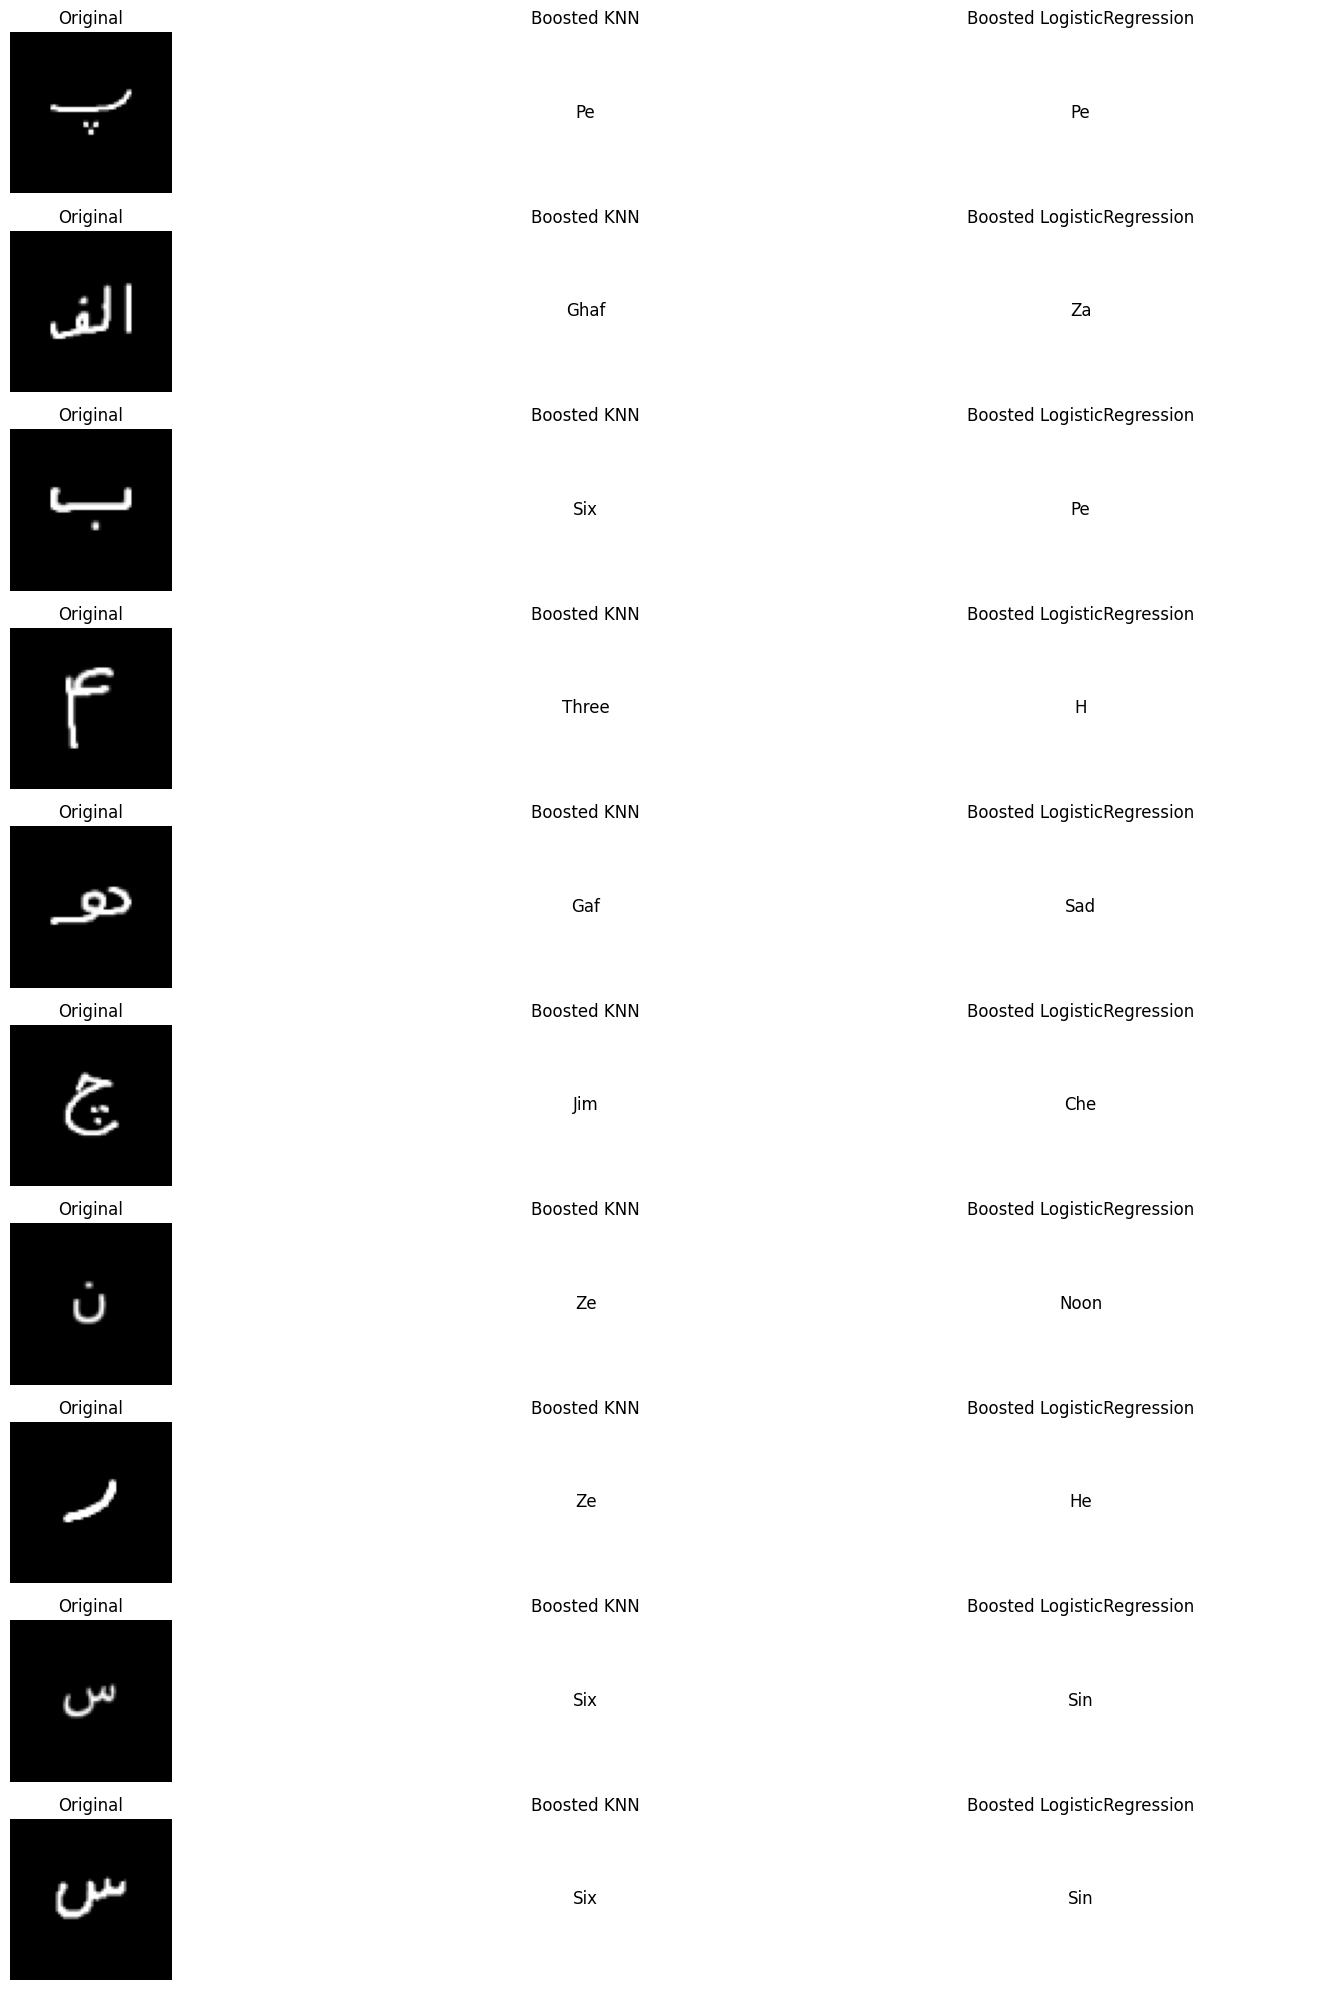

In [23]:
import os
import cv2 as cv

num_images = len(os.listdir(REAL_DATA))
num_models = 2
plt.figure(figsize=(15, num_images * 2))

for i, img_name in enumerate(os.listdir(REAL_DATA)):
    image_path = os.path.join(REAL_DATA, img_name)
    image = cv.imread(image_path, cv.IMREAD_GRAYSCALE)
    image = dataloader.centerize(image)  
    image = dataloader.normalize(image)

    plt.subplot(num_images, num_models + 1, i * (num_models + 1) + 1)  
    plt.imshow(image, cmap='gray')
    plt.title('Original')
    plt.axis('off') 

    j=0
    
    tree_pred = boosted_tree.predict_proba(image.reshape(1, INPUT_SHAPE[0] * INPUT_SHAPE[1]))
    plt.subplot(num_images, num_models + 1, i * (num_models + 1) + j + 2)
    plt.text(0.5, 0.5, str(LABELS[np.argmax(tree_pred)]), fontsize=12, ha='center', va='center')
    plt.title('Boosted KNN')
    plt.axis('off') 
    j+=1


    logreg_pred = boosted_logreg.predict_proba(image.reshape(1, INPUT_SHAPE[0] * INPUT_SHAPE[1]))
    plt.subplot(num_images, num_models + 1, i * (num_models + 1) + j + 2)
    plt.text(0.5, 0.5, str(LABELS[np.argmax(logreg_pred)]), fontsize=12, ha='center', va='center')
    plt.title('Boosted LogisticRegression')
    plt.axis('off') 
    j+=1



plt.tight_layout()
plt.show()